# Bitcoin halving historical  data analysis

- Data is collected from 2011-01-01 to the first months of 2021, specifically 2021-03-31, with corresponding values ​​such as BTC's price (Open, Close, High, Low) and Weighted price of BTC, i.e., is the average price based on the corresponding value as on the price of BTC. Data is collected every minute about the change in BTC price; the data also includes the Volume of BTC and the Volume of the entire Crypto market while the information is collected.

- I will use this data to analyze the reaction of BTC, why the Bitcoin halving events in history see if the Bitcoin halving event, the fish price has increased as people say.

- And above all, with the question of whether Bitcoin is a store of value over time or just a bubble, as many news sites report, in my opinion. I use tools like (pandas, matplotlib, and seaborn) to complete the course project from [Data Analysis with Python: Zero to Pandas](zerotopandas.com) course. As I do not have any experience in the technology field and this is the course, I am determined to take to the end, and this course gives me an overview of data analysis.


## Downloading the Dataset

First, I'll install `Jovian` and `Opendatasets`, then assign `dataset_url` with a link to `Kaggle`, where I get the Bitcoin data. And next is the import of the `os module`, the functionality that the `OS module` provides that allows us to communicate with the underlying operating system that Python is running on.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\bitcoin-historical-data" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './bitcoin-historical-data'

In [5]:
import os
os.listdir(data_dir)

['.ipynb_checkpoints', 'bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "bitcoin-halving-historical-data-analysis" 

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "huymvpgoat/bitcoin-halving-historical-data-analysis"
[jovian] Committed successfully! https://jovian.ai/huymvpgoat/bitcoin-halving-historical-data-analysis


'https://jovian.ai/huymvpgoat/bitcoin-halving-historical-data-analysis'

## Data Preparation and Cleaning

Tôi sử dụng các hàm của pandas để sử lý các giữ liệu NaN, và thay đổi `Timestamp` thành `date` để dễ làm việc hơn với data.

In [9]:
import pandas as pd

In [10]:
bitcoin_df = pd.read_csv(data_dir + "/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [11]:
bitcoin_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
bitcoin_df.shape

(4857377, 8)

There are eight columns and 4,857,377 rows according to the data shape information. Start processing with Timestamps and NaN values.

In [13]:
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['Timestamp'], unit='s')

In [14]:
bitcoin_df.shape

(4857377, 9)

In [15]:
bitcoin_df= bitcoin_df.reindex(columns=['date','Timestamp', 'Open', 'Close', 'High', 'Low', 'Weighted_Price', 'Volume_(BTC)','Volume_(Currency)'])

In [16]:
bitcoin_df.head()

,date,Timestamp,Open,Close,High,Low,Weighted_Price,Volume_(BTC),Volume_(Currency)
0,2011-12-31 07:52:00,1325317920,4.39,4.39,4.39,4.39,4.39,0.455581,2.0
1,2011-12-31 07:53:00,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
bitcoin_df= bitcoin_df.dropna(how= 'any')

In [18]:
bitcoin_df.head()

,date,Timestamp,Open,Close,High,Low,Weighted_Price,Volume_(BTC),Volume_(Currency)
0,2011-12-31 07:52:00,1325317920,4.39,4.39,4.39,4.39,4.390000,0.455581,2.000000
478,2011-12-31 15:50:00,1325346600,4.39,4.39,4.39,4.39,4.390000,48.000000,210.720000
547,2011-12-31 16:59:00,1325350740,4.50,4.57,4.57,4.50,4.526411,37.862297,171.380338
548,2011-12-31 17:00:00,1325350800,4.58,4.58,4.58,4.58,4.580000,9.000000,41.220000
1224,2012-01-01 04:16:00,1325391360,4.58,4.58,4.58,4.58,4.580000,1.502000,6.879160


In [19]:
bitcoin_df= bitcoin_df.drop(columns='Timestamp')

In [20]:
bitcoin_df

,date,Open,Close,High,Low,Weighted_Price,Volume_(BTC),Volume_(Currency)
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,4.390000,0.455581,2.000000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,4.390000,48.000000,210.720000
547,2011-12-31 16:59:00,4.50,4.57,4.57,4.50,4.526411,37.862297,171.380338
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,4.580000,9.000000,41.220000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,4.580000,1.502000,6.879160
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58686.00,58714.31,58686.00,58692.753339,1.384487,81259.372187
4857373,2021-03-30 23:57:00,58683.97,58685.81,58693.43,58683.97,58693.226508,7.294848,428158.146640
4857374,2021-03-30 23:58:00,58693.43,58723.84,58723.84,58693.43,58696.198496,1.705682,100117.070370
4857375,2021-03-30 23:59:00,58742.18,58760.59,58770.38,58742.18,58761.866202,0.720415,42332.958633


The NaN values of the data frame indicate the level of transactions or prices at that time and further data row by row with a 1-minute interval between data sets. So I used the `dropna()` function to handle these missing data by removing the NaN values

# Exploratory Analysis and Visualization

* Tôi sẽ tìm hiểu giá cả trung bình(weighted price) của Bitcoin. Đồng thời tôi cũng muốn tìm hiểu trong năm xảy ra sự kiện halving và năm sau sự kiện halving thì sự tăng trưởng về giá cả xảy ra như thế nào. 
* Với mục tiêu tìm hiểu là trả lời cho câu hỏi tại sao Bitcoin là một tài sản lưu trữ giá trị hoạt động hiệu quả hay không? Và đồng thời sự kiện halving đã thúc đẩy sự phục hời và phát triển về giá cả Bitcoin như thế nào?

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In addition, data was collected from 2011-01-01 to the first months of 2021, specifically 2021-03-31.

During this time, Bitcoin has its event, the Bitcoin Halving, which is summarized in years according to the documents of Forbes 2012, 2016, 2020
- The first halving was on November 28, 2012
- The second halving took place on July 9, 2016
- The third time this event takes place is on May 11, 2020

* Usually, when the Bitcoin halving event takes place, the price of the Bitcoin pump goes up significantly. So we'll focus on data mining in these years and also visualize at the `Weighted_Price` level.

### Price movement of BTC in halving year
- I will look at doing a weighted price of BTC in the year of the halving and the five stars to see if there is significant growth when this event occurs.

For the Data preparation phase, I have traced back to different periods of the year, specifically from the beginning of the year before and after the Bitcoin halving event. Also, I wanted to take a longer-term perspective, so I wanted to see what would happen a year later.
- The data used for visualization is the `weighted price` of Bitcoin
- Specifically, the change of `weighted price` from the beginning of 2012 to before and after the halving to the end of 2012, and I also visualized the data for 2012 and 2013.
- Similarly, I carried out the data preparation stages for the next two halving lanes in 2016 and 2020. But for 2021 alone, the data is only displayed until March 21, 2021.

In [22]:
#prepare data

#before halving 2012
bf_hal_2012= (bitcoin_df['date'] >= '2012-01-01') & (bitcoin_df['date']< '2012-11-28')
bf_hal_2012_w_p= bitcoin_df.loc[bf_hal_2012]['Weighted_Price']
bf_hal_2012_date= bitcoin_df.loc[bf_hal_2012]['date']
#after halving 2012
af_hal_2012= (bitcoin_df['date'] >= '2012-11-28') & (bitcoin_df['date']< '2013-01-01')
af_hal_2012_w_p= bitcoin_df.loc[af_hal_2012]['Weighted_Price']
af_hal_2012_date= bitcoin_df.loc[af_hal_2012]['date']
#a year after halving 2012
loc_2013= (bitcoin_df['date'] >= '2013-01-01') & (bitcoin_df['date']< '2014-01-01')
year_af_2012_w_p= bitcoin_df.loc[loc_2013]['Weighted_Price']
year_af_2012_date= bitcoin_df.loc[loc_2013]['date']

#before halving 2016
bf_hal_2016= (bitcoin_df['date'] >= '2016-01-01') & (bitcoin_df['date']< '2016-07-09')
bf_hal_2016_w_p= bitcoin_df.loc[bf_hal_2016]['Weighted_Price']
bf_hal_2016_date= bitcoin_df.loc[bf_hal_2016]['date']
#after halving 2016
af_hal_2016= (bitcoin_df['date'] >= '2016-07-09') & (bitcoin_df['date']< '2017-01-01')
af_hal_2016_w_p= bitcoin_df.loc[af_hal_2016]['Weighted_Price']
af_hal_2016_date= bitcoin_df.loc[af_hal_2016]['date']
#a year after halving 2016
loc_2017= (bitcoin_df['date'] >= '2017-01-01') & (bitcoin_df['date']< '2018-01-01')
year_af_2016_w_p= bitcoin_df.loc[loc_2017]['Weighted_Price']
year_af_2016_date= bitcoin_df.loc[loc_2017]['date']

#before halving 2020
bf_hal_2020= (bitcoin_df['date'] >= '2020-01-01') & (bitcoin_df['date']< '2020-05-11')
bf_hal_2020_w_p= bitcoin_df.loc[bf_hal_2020]['Weighted_Price']
bf_hal_2020_date= bitcoin_df.loc[bf_hal_2020]['date']
#after halving 2020
af_hal_2020= (bitcoin_df['date'] >= '2020-05-11') & (bitcoin_df['date']< '2021-01-01')
af_hal_2020_w_p= bitcoin_df.loc[af_hal_2020]['Weighted_Price']
af_hal_2020_date= bitcoin_df.loc[af_hal_2020]['date']
#a year after halving 2020
loc_2021= (bitcoin_df['date'] >= '2021-01-01') & (bitcoin_df['date']< '2021-03-31')
year_af_2020_w_p= bitcoin_df.loc[loc_2021]['Weighted_Price']
year_af_2020_date= bitcoin_df.loc[loc_2021]['date']

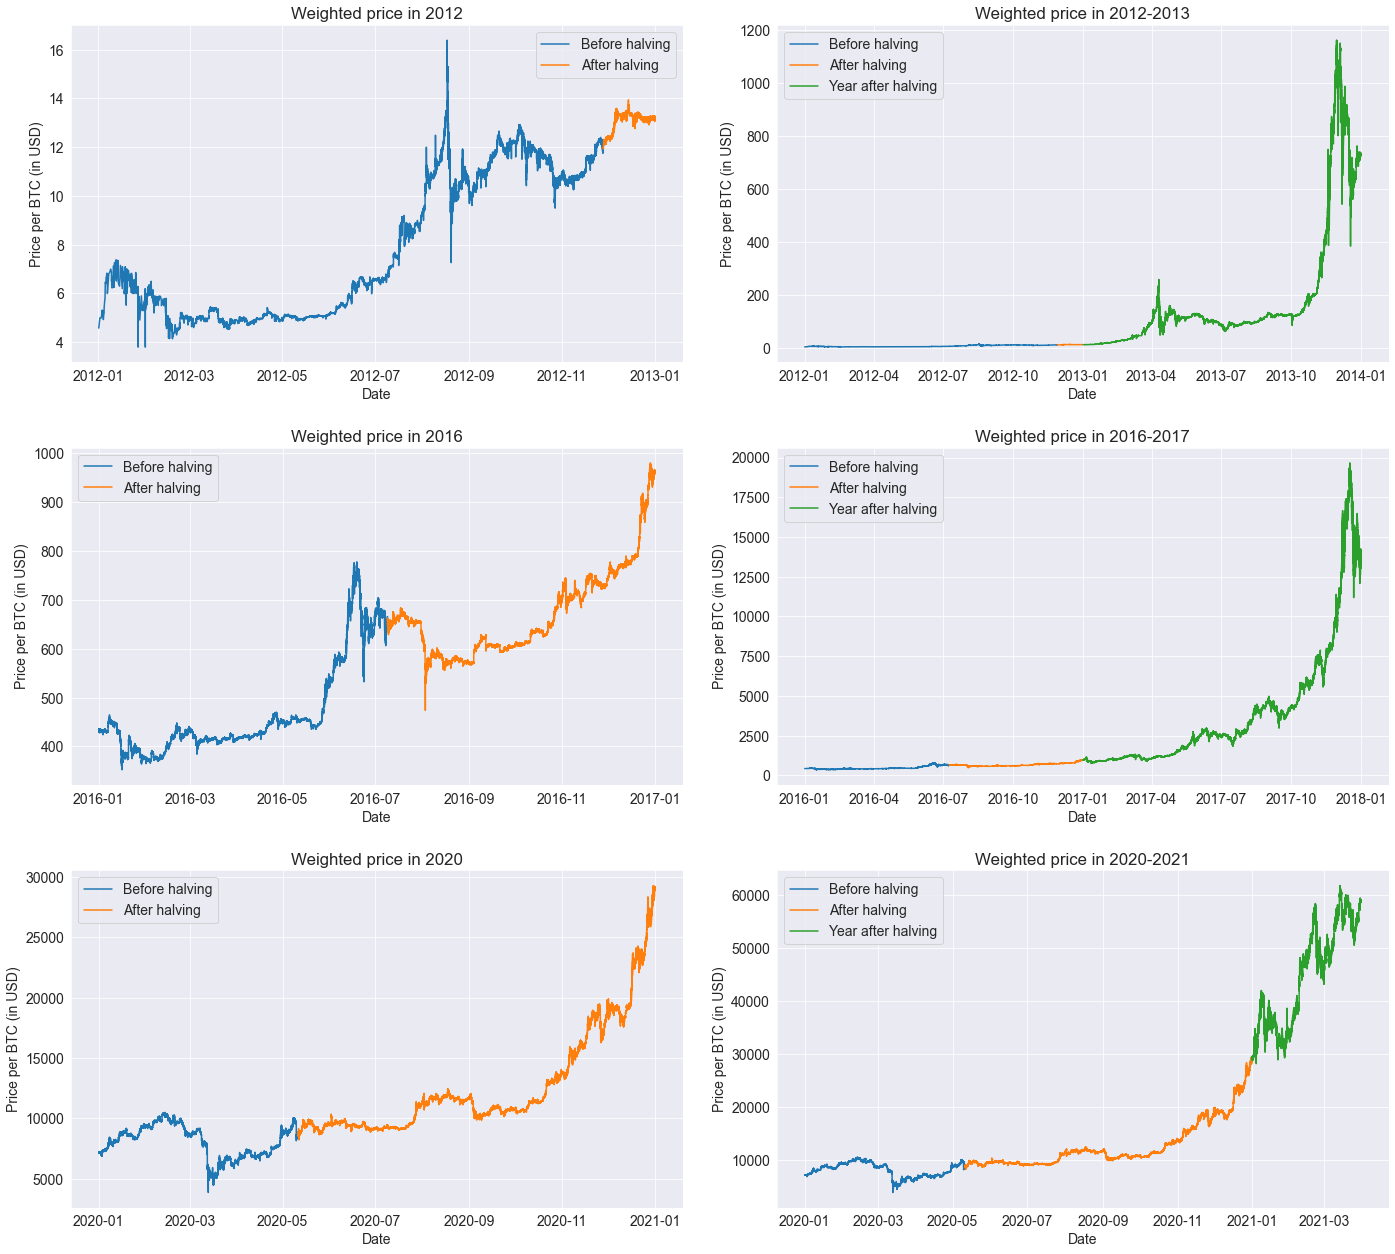

In [23]:
fig, ax= plt.subplots(3,2, figsize= (20,18))

ax[0,0].plot(bf_hal_2012_date, bf_hal_2012_w_p)
ax[0,0].plot(af_hal_2012_date,af_hal_2012_w_p)
ax[0,0].set(title= 'Weighted price in 2012', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[0,0].legend(['Before halving', 'After halving']);

ax[0,1].plot(bf_hal_2012_date, bf_hal_2012_w_p)
ax[0,1].plot(af_hal_2012_date,af_hal_2012_w_p)
ax[0,1].plot(year_af_2012_date, year_af_2012_w_p)
ax[0,1].set(title= 'Weighted price in 2012-2013', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[0,1].legend(['Before halving', 'After halving', 'Year after halving']);

ax[1,0].plot(bf_hal_2016_date, bf_hal_2016_w_p)
ax[1,0].plot(af_hal_2016_date,af_hal_2016_w_p)
ax[1,0].set(title= 'Weighted price in 2016', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[1,0].legend(['Before halving', 'After halving']);

ax[1,1].plot(bf_hal_2016_date, bf_hal_2016_w_p)
ax[1,1].plot(af_hal_2016_date,af_hal_2016_w_p)
ax[1,1].plot(year_af_2016_date, year_af_2016_w_p)
ax[1,1].set(title= 'Weighted price in 2016-2017', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[1,1].legend(['Before halving', 'After halving', 'Year after halving']);

ax[2,0].plot(bf_hal_2020_date, bf_hal_2020_w_p)
ax[2,0].plot(af_hal_2020_date,af_hal_2020_w_p)
ax[2,0].set(title= 'Weighted price in 2020', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[2,0].legend(['Before halving', 'After halving']);

ax[2,1].plot(bf_hal_2020_date, bf_hal_2020_w_p)
ax[2,1].plot(af_hal_2020_date,af_hal_2020_w_p)
ax[2,1].plot(year_af_2020_date, year_af_2020_w_p)
ax[2,1].set(title= 'Weighted price in 2020-2021', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[2,1].legend(['Before halving', 'After halving', 'Year after halving']);
plt.tight_layout (pad=2)

It is worth noting that in the year of the halving, the weighted price of BTC has grown and recovered, but the actual growth in the price of BTC that occurred in the year after the halving is apparent. You can see that the price of BTC in the year after the halving event (green area) had tremendous growth in 2013 and 2017. Particularly in the year after the 2020 halving event, our data is only collected until March 2021 but still shows an evident growth.

### Close price and volume of BTC in halving year and year after
- I want to use the way to split the data into small data frames to make it easier to visualize the data and, at the same time, generate the data frame divided by date.

In [24]:
"""prepare data 2012"""
df_2012_pre= (bitcoin_df['date'] >= '2012-01-01') & (bitcoin_df['date']< '2013-01-01')
x= bitcoin_df.loc[df_2012_pre]
df_2012= pd.DataFrame(x)

#create data frame in 2012
df_2012_group_non_vol= df_2012.drop(columns=['Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)'])
df_2012_group_non_vol.set_index('date', inplace=True)

df_2012_vol= df_2012.drop(columns=['Open', 'Close', 'High', 'Low', 'Weighted_Price'])
df_2012_vol.set_index('date', inplace=True)

#create data frame in day for Open, Close, High, Low in 2012
df_2012_in_day= df_2012_group_non_vol[['Open', 'Close', 'High', 'Low']].resample('D'). mean()


#create data frame in day for Volume (BTC), and Volume (Currency) in 2012
df_2012_volume_in_day= df_2012_vol[['Volume_(BTC)', 'Volume_(Currency)']].resample('D'). mean()


"""prepare data 2013"""
df_2013_pre= (bitcoin_df['date'] >= '2013-01-01') & (bitcoin_df['date']< '2014-01-01')
x1= bitcoin_df.loc[df_2013_pre]
df_2013= pd.DataFrame(x1)
#create data frame in 2013
df_2013_group_non_vol= df_2013.drop(columns=['Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)'])
df_2013_group_non_vol.set_index('date', inplace=True)

df_2013_vol= df_2013.drop(columns=['Open', 'Close', 'High', 'Low', 'Weighted_Price'])
df_2013_vol.set_index('date', inplace=True)
#create data frame in day for Open, Close, High, Low in 2013
df_2013_in_day= df_2013_group_non_vol[['Open', 'Close', 'High', 'Low']].resample('D'). mean()

#create data frame in day for Volume (BTC), and Volume (Currency) in 2013
df_2013_volume_in_day= df_2013_vol[['Volume_(BTC)', 'Volume_(Currency)']].resample('D'). mean()



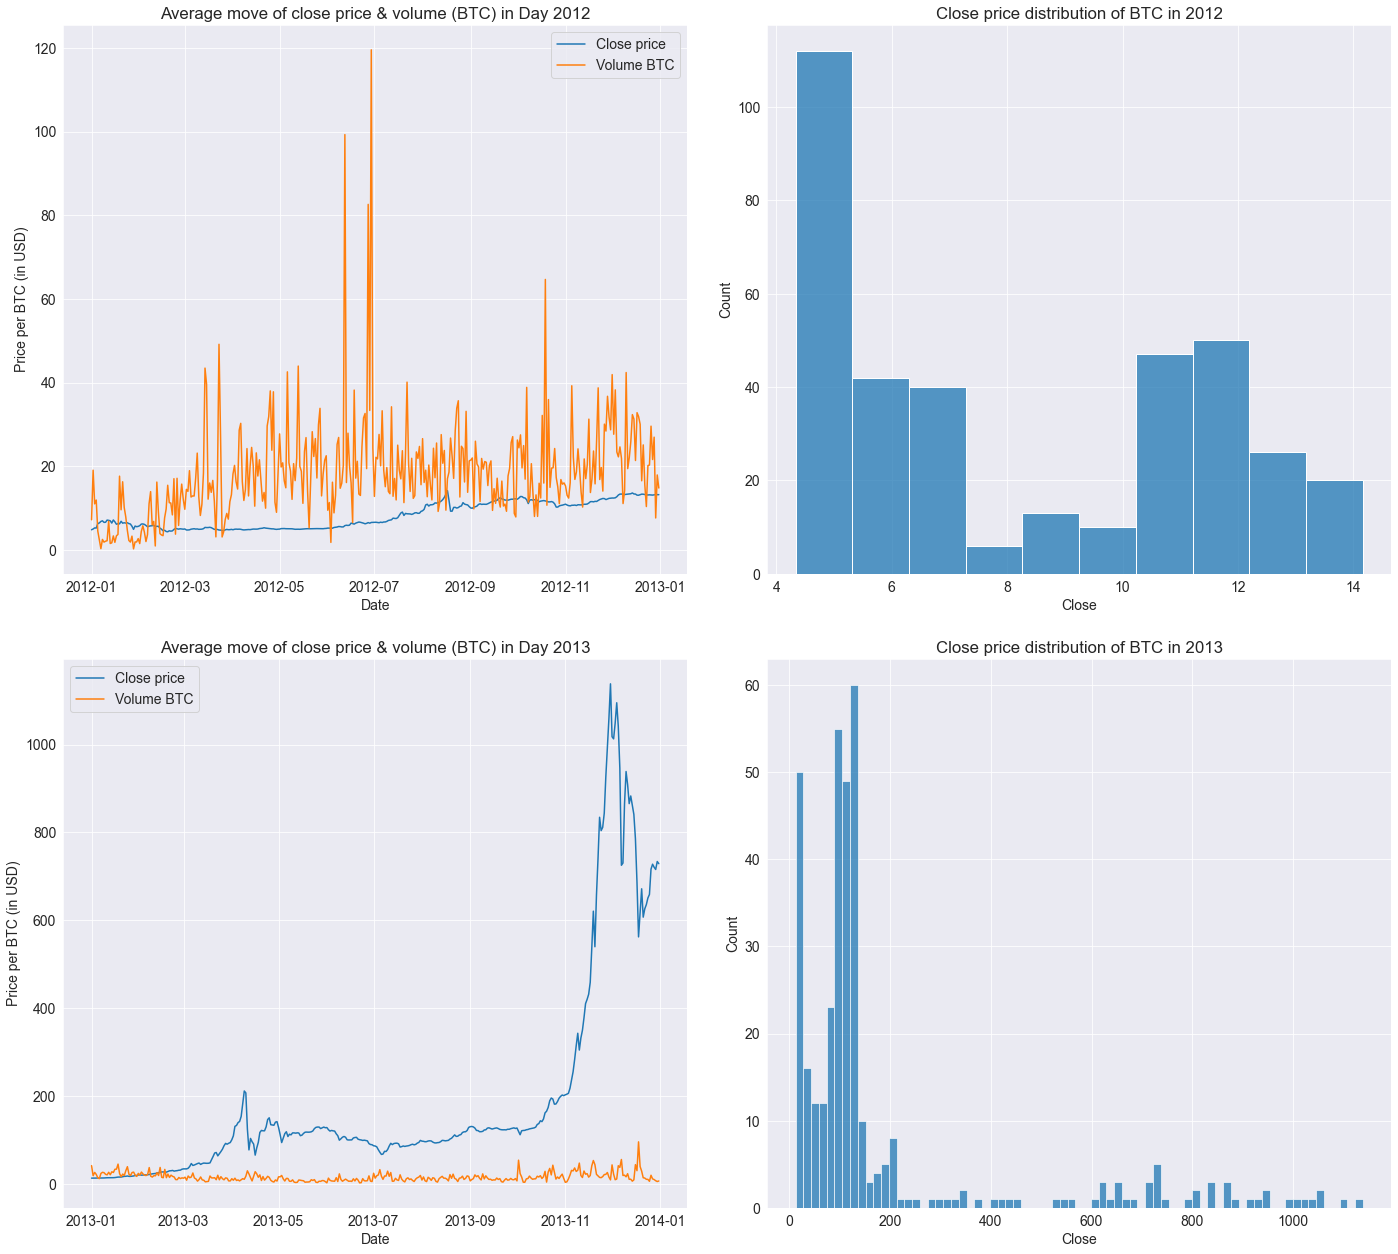

In [35]:
fig, ax= plt.subplots(2,2, figsize= (20,18))

ax[0,0].plot(df_2012_in_day['Close'])
ax[0,0].plot(df_2012_volume_in_day['Volume_(BTC)'])
ax[0,0].set(title= 'Average move of close price & volume (BTC) in Day 2012', xlabel= 'Date',ylabel= 'Price per BTC (in USD)');
ax[0,0].legend(['Close price', 'Volume BTC'])

ax[0,1].set_title('Close price distribution of BTC in 2012')
sns.histplot(df_2012_in_day['Close'], ax=ax[0,1]);


ax[1,0].plot(df_2013_in_day['Close'])
ax[1,0].plot(df_2013_volume_in_day['Volume_(BTC)'])
ax[1,0].set(title= 'Average move of close price & volume (BTC) in Day 2013', xlabel= 'Date',ylabel= 'Price per BTC (in USD)');
ax[1,0].legend(['Close price', 'Volume BTC']);

ax[1,1].set_title('Close price distribution of BTC in 2013')
sns.histplot(df_2013_in_day['Close'], ax=ax[1,1]);

plt.tight_layout (pad=2)

The closing price of BTC in 2012 allocated mainly `$4` to `$6` , and after the halving event, the price increased but not clearly, and the volume of BTC at this time is relatively high.
But when it came to 2013, the price of BTC had an apparent growth, and at the same time, in November, the close price of BTC once reached the `$1000`

In [26]:
"""prepare data 2016"""
df_2016_pre= (bitcoin_df['date'] >= '2016-01-01') & (bitcoin_df['date']< '2017-01-01')
y= bitcoin_df.loc[df_2016_pre]
df_2016= pd.DataFrame(y)

#create data frame in 2016
df_2016_group_non_vol= df_2016.drop(columns=['Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)'])
df_2016_group_non_vol.set_index('date', inplace=True)

df_2016_vol= df_2016.drop(columns=['Open', 'Close', 'High', 'Low', 'Weighted_Price'])
df_2016_vol.set_index('date', inplace=True)

#create data frame in day for Open, Close, High, Low in 2016
df_2016_in_day= df_2016_group_non_vol[['Open', 'Close', 'High', 'Low']].resample('D'). mean()


#create data frame in day for Volume (BTC), and Volume (Currency) in 2016
df_2016_volume_in_day= df_2016_vol[['Volume_(BTC)', 'Volume_(Currency)']].resample('D'). mean()


"""prepare data 2017"""
df_2017_pre= (bitcoin_df['date'] >= '2017-01-01') & (bitcoin_df['date']< '2018-01-01')
y1= bitcoin_df.loc[df_2017_pre]
df_2017= pd.DataFrame(y1)
#create data frame in 2013
df_2017_group_non_vol= df_2017.drop(columns=['Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)'])
df_2017_group_non_vol.set_index('date', inplace=True)

df_2017_vol= df_2017.drop(columns=['Open', 'Close', 'High', 'Low', 'Weighted_Price'])
df_2017_vol.set_index('date', inplace=True)
#create data frame in day for Open, Close, High, Low in 2017
df_2017_in_day= df_2017_group_non_vol[['Open', 'Close', 'High', 'Low']].resample('D'). mean()

#create data frame in day for Volume (BTC), and Volume (Currency) in 2017
df_2017_volume_in_day= df_2017_vol[['Volume_(BTC)', 'Volume_(Currency)']].resample('D'). mean()


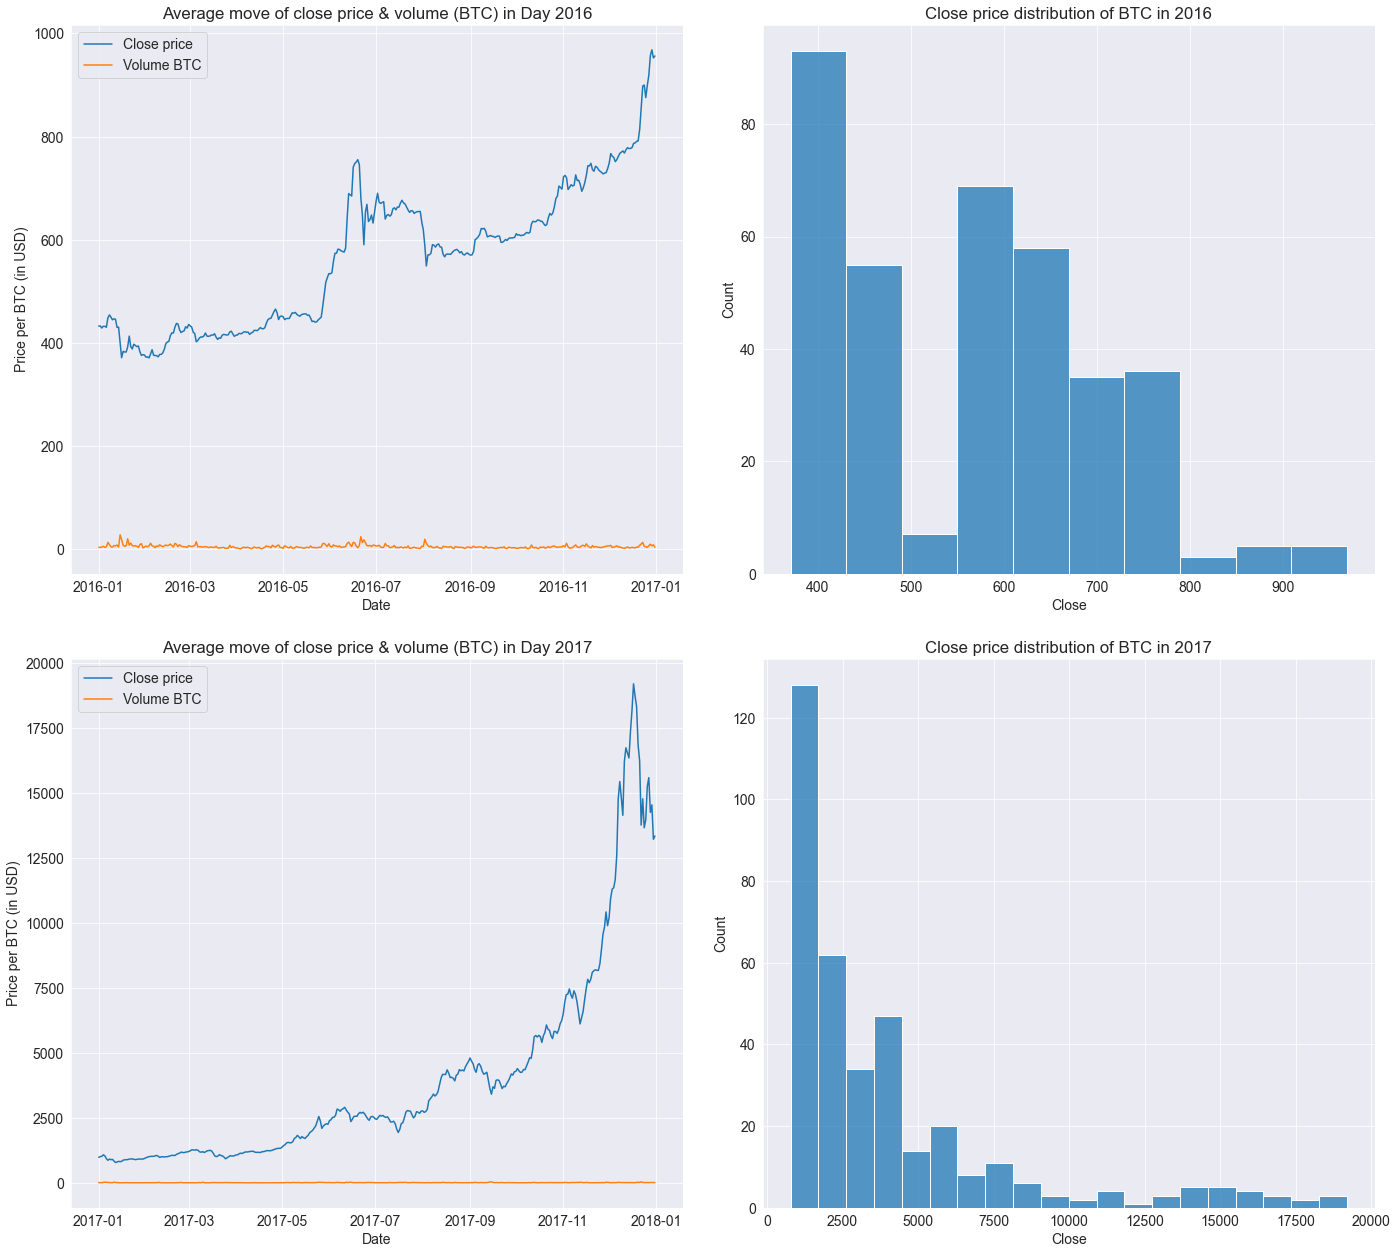

In [34]:
fig, ax= plt.subplots(2,2, figsize= (20,18))

ax[0,0].plot(df_2016_in_day['Close'])
ax[0,0].plot(df_2016_volume_in_day['Volume_(BTC)'])
ax[0,0].set(title= 'Average move of close price & volume (BTC) in Day 2016', xlabel= 'Date',ylabel= 'Price per BTC (in USD)');
ax[0,0].legend(['Close price', 'Volume BTC'])

ax[0,1].set_title('Close price distribution of BTC in 2016')
sns.histplot(df_2016_in_day['Close'], ax=ax[0,1]);


ax[1,0].plot(df_2017_in_day['Close'])
ax[1,0].plot(df_2017_volume_in_day['Volume_(BTC)'])
ax[1,0].set(title= 'Average move of close price & volume (BTC) in Day 2017', xlabel= 'Date',ylabel= 'Price per BTC (in USD)');
ax[1,0].legend(['Close price', 'Volume BTC']);

ax[1,1].set_title('Close price distribution of BTC in 2017')
sns.histplot(df_2017_in_day['Close'], ax=ax[1,1]);

plt.tight_layout (pad=2)

In 2016, the price of BTC, after the halving, had a precise correction and recovery and has been growing until the end of the year. But by 2017, the close price has added incredible growth.

In [28]:
"""prepare data 2020"""
df_2020_pre= (bitcoin_df['date'] >= '2020-01-01') & (bitcoin_df['date']< '2021-01-01')
z= bitcoin_df.loc[df_2020_pre]
df_2020= pd.DataFrame(z)

#create data frame in 2020
df_2020_group_non_vol= df_2020.drop(columns=['Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)'])
df_2020_group_non_vol.set_index('date', inplace=True)

df_2020_vol= df_2020.drop(columns=['Open', 'Close', 'High', 'Low', 'Weighted_Price'])
df_2020_vol.set_index('date', inplace=True)

#create data frame in day for Open, Close, High, Low in 2020
df_2020_in_day= df_2020_group_non_vol[['Open', 'Close', 'High', 'Low']].resample('D'). mean()


#create data frame in day for Volume (BTC), and Volume (Currency) in 2020
df_2020_volume_in_day= df_2020_vol[['Volume_(BTC)', 'Volume_(Currency)']].resample('D'). mean()


"""prepare data 2021"""
df_2021_pre= (bitcoin_df['date'] >= '2021-01-01') & (bitcoin_df['date']< '2021-03-31')
z1= bitcoin_df.loc[df_2021_pre]
df_2021= pd.DataFrame(z1)
#create data frame in 2021
df_2021_group_non_vol= df_2021.drop(columns=['Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)'])
df_2021_group_non_vol.set_index('date', inplace=True)

df_2021_vol= df_2021.drop(columns=['Open', 'Close', 'High', 'Low', 'Weighted_Price'])
df_2021_vol.set_index('date', inplace=True)
#create data frame in day for Open, Close, High, Low in 2021
df_2021_in_day= df_2021_group_non_vol[['Open', 'Close', 'High', 'Low']].resample('D'). mean()

#create data frame in day for Volume (BTC), and Volume (Currency) in 2021
df_2021_volume_in_day= df_2021_vol[['Volume_(BTC)', 'Volume_(Currency)']].resample('D'). mean()

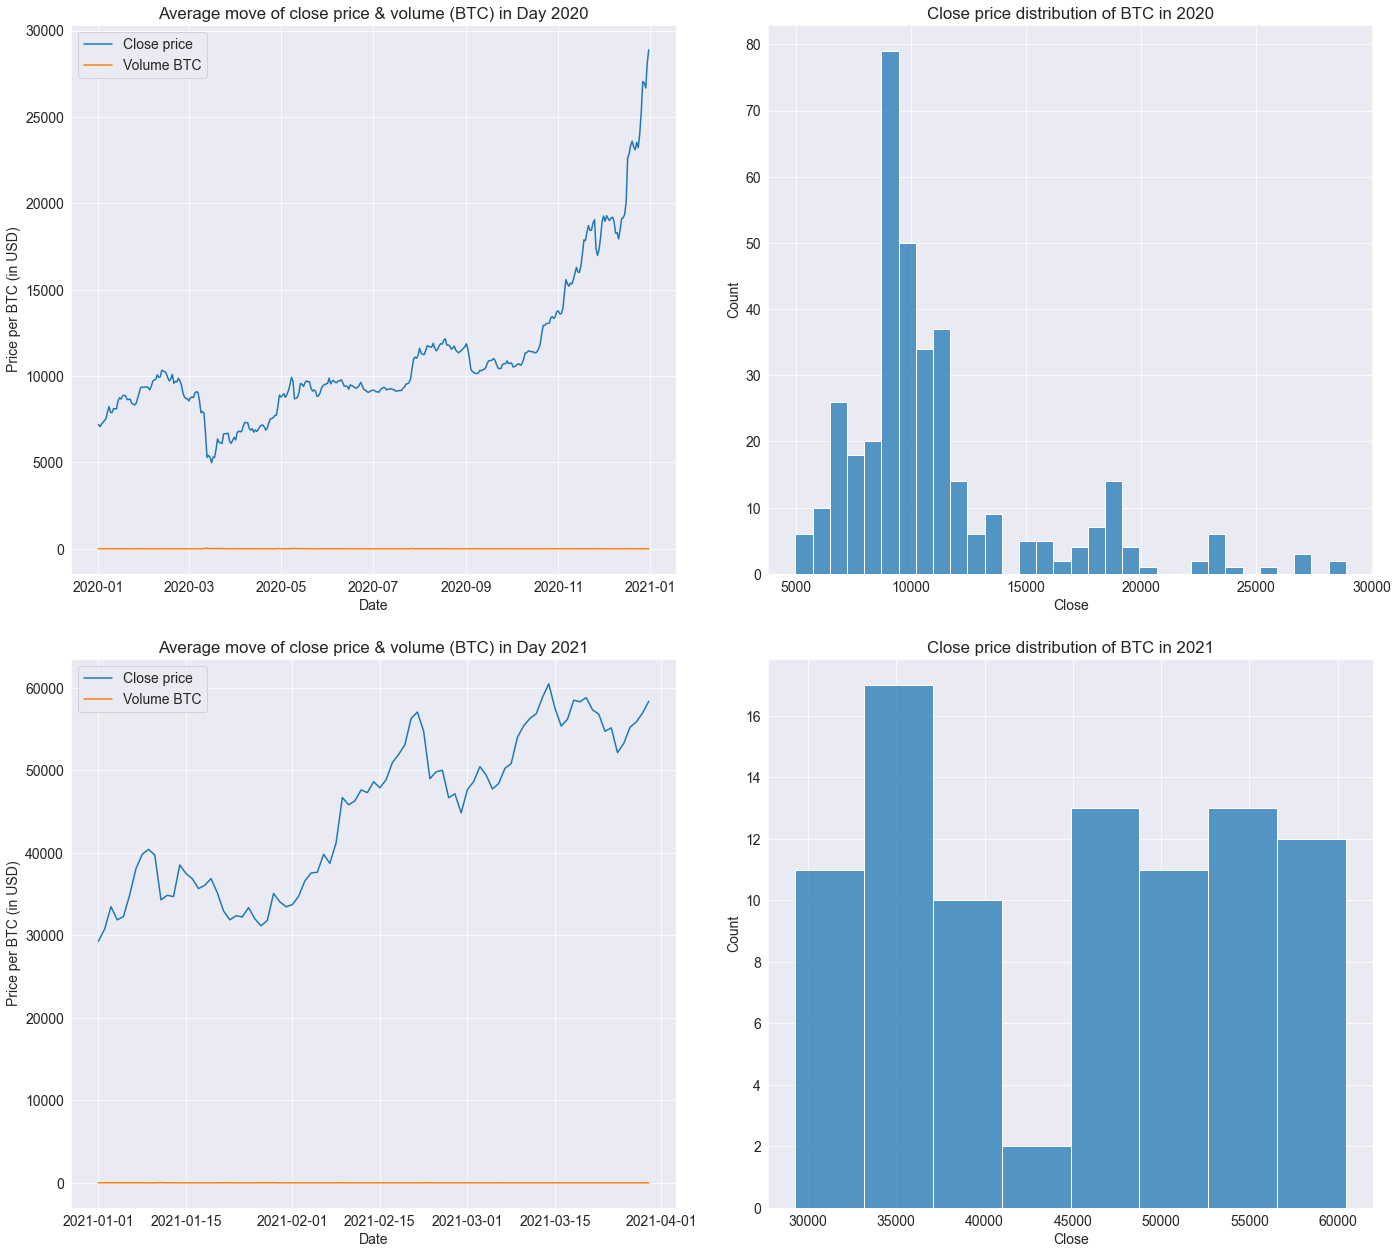

In [31]:
fig, ax= plt.subplots(2,2, figsize= (20,18))

ax[0,0].plot(df_2020_in_day['Close'])
ax[0,0].plot(df_2020_volume_in_day['Volume_(BTC)'])
ax[0,0].set(title= 'Average move of close price & volume (BTC) in Day 2020', xlabel= 'Date',ylabel= 'Price per BTC (in USD)');
ax[0,0].legend(['Close price', 'Volume BTC'])

ax[0,1].set_title('Close price distribution of BTC in 2020')
sns.histplot(df_2020_in_day['Close'], ax=ax[0,1]);


ax[1,0].plot(df_2021_in_day['Close'])
ax[1,0].plot(df_2021_volume_in_day['Volume_(BTC)'])
ax[1,0].set(title= 'Average move of close price & volume (BTC) in Day 2021', xlabel= 'Date',ylabel= 'Price per BTC (in USD)');
ax[1,0].legend(['Close price', 'Volume BTC']);

ax[1,1].set_title('Close price distribution of BTC in 2021')
sns.histplot(df_2021_in_day['Close'], ax=ax[1,1]);


plt.tight_layout (pad=2)

The growth of BTC is also very evident, even though the data is only available until March 2021. The volume of BTC at this time is relatively low and stable. During the first three months of 2021, the price of BTC is concentrated mainly in the `$45000` to `$60000` area.

## Asking and Answering Questions
Based on what I have intuitively known, we will answer some related questions about BTC.
- Q1: What is the Bitcoin halving event we are learning about?
- Q2: How did the price of Bitcoin change during the year of the halving?
- Q3: How does Bitcoin's price grow in the year after the halving?
- Q4: Is Bitcoin an efficient store of value?
- Q5: Should I invest in Bitcoin? (personal perspective)

### Q1: What is the Bitcoin halving event we are learning about?

Bitcoin halving is the process of halving the block rewards of Bitcoin mining. About every 4 years, corresponding to every 210,000 blocks mined, the Bitcoin halving will be held once until all 21 million Bitcoins are mined (estimated around 2140).

### Q2: How did the price of Bitcoin change during the year of the halving?

During the year of the halving event, the price showed signs of recovery but did not have strong growth.
First, with 2012, try to see the opening and closing price of BTC.

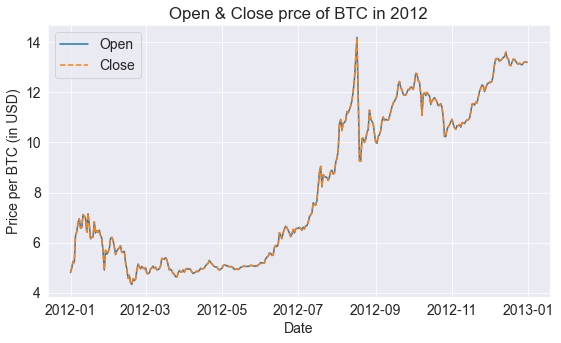

In [56]:
plt.plot(df_2012_in_day['Open'])
plt.plot(df_2012_in_day['Close'], '--')
plt.title('Open & Close prce of BTC in 2012')
plt.ylabel('Price per BTC (in USD)')
plt.xlabel('Date')
plt.legend(['Open', 'Close']);

After November, the price had a nice growth and recovered after being dumped in October

Tương tự với năm 2016 và 2020

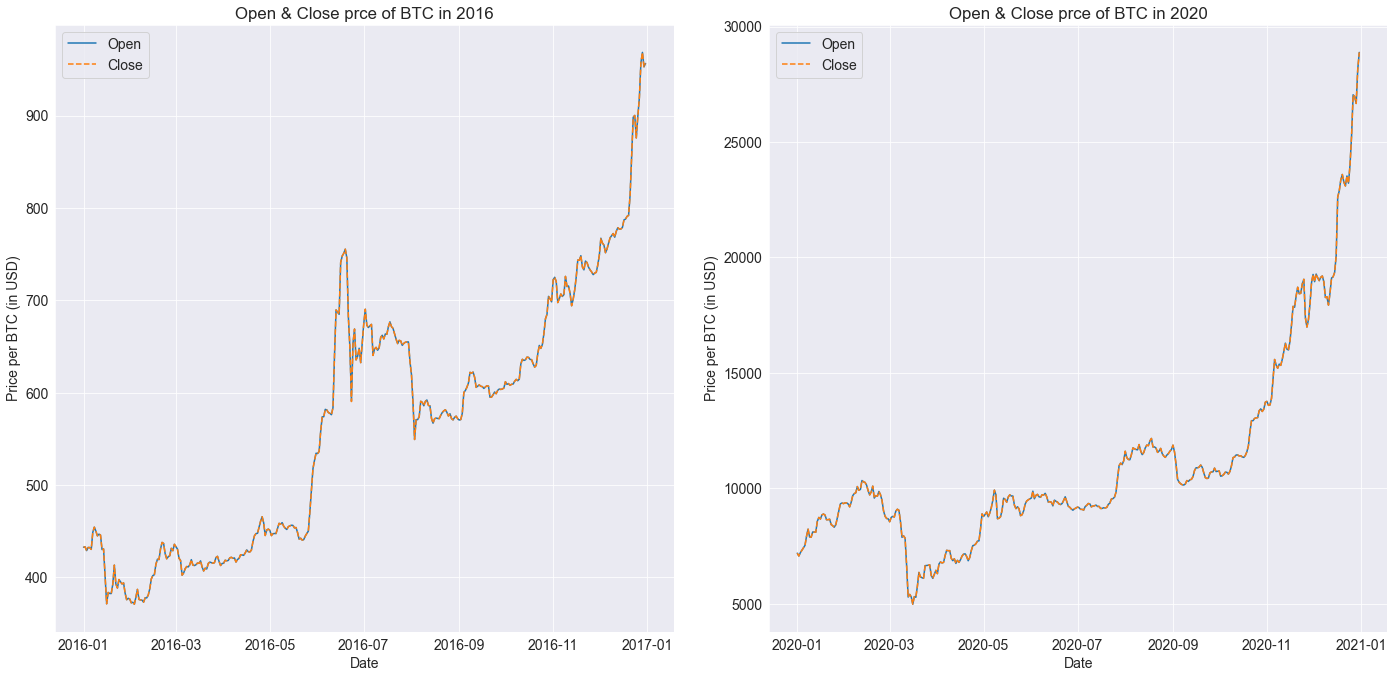

In [63]:
fig, ax= plt.subplots(1,2, figsize= (20,10))

ax[0].plot(df_2016_in_day['Open'])
ax[0].plot(df_2016_in_day['Close'], '--')
ax[0].set(title= 'Open & Close prce of BTC in 2016', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[0].legend(['Open', 'Close']);

ax[1].plot(df_2020_in_day['Open'])
ax[1].plot(df_2020_in_day['Close'], '--')
ax[1].set(title= 'Open & Close prce of BTC in 2020', xlabel= 'Date',ylabel= 'Price per BTC (in USD)')
ax[1].legend(['Open', 'Close']);

plt.tight_layout (pad=2)



- In 2016, after July, there was a noticeable growth after the end of the halving and lasted until the end of the year. Even after the halving, the price of BTC fell and went sideways, and the growth started in September.

- In 2020, the price of BTC grew continuously after the halving event in May and remained strong until the end of the year.



### Q3: How does Bitcoin's price grow in the year after the halving?

To see how the year's close price after the halving event has changed, we can look at some basic information, such as the highest closing prices of 2013, 2016, and 2021 (only the first three months of 2021).

In [75]:
df_2012_in_day['Close'].tail(1)

date
2012-12-31    13.196757
Freq: D, Name: Close, dtype: float64

In [67]:
df_2013_in_day['Close'].max()

1138.0915997181114

In [77]:
((df_2013_in_day['Close'].max()-(df_2012_in_day['Close'].tail(1)))*100)/ df_2012_in_day['Close'].tail(1)

date
2012-12-31    8524.024984
Freq: D, Name: Close, dtype: float64

We can see that the price of BTC at the end of 2012 has outperformed by increasing `by 8523%` from the 2013 peak price.

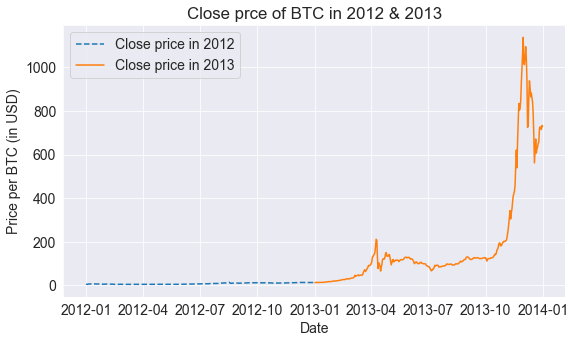

In [81]:
plt.plot(df_2012_in_day['Close'], '--')
plt.plot(df_2013_in_day['Close'])
plt.title('Close prce of BTC in 2012 & 2013')
plt.ylabel('Price per BTC (in USD)')
plt.xlabel('Date')
plt.legend(['Close price in 2012', 'Close price in 2013']);

In [82]:
df_2016_in_day['Close'].tail(1)

date
2016-12-31    956.381348
Freq: D, Name: Close, dtype: float64

In [83]:
df_2017_in_day['Close'].max()

19190.340631944444

In [85]:
((df_2017_in_day['Close'].max()-(df_2016_in_day['Close'].tail(1)))*100)/ df_2016_in_day['Close'].tail(1)

date
2016-12-31    1906.557392
Freq: D, Name: Close, dtype: float64

The price of BTC at the end of 2016 has increased `1906%` from the peak price of 2017

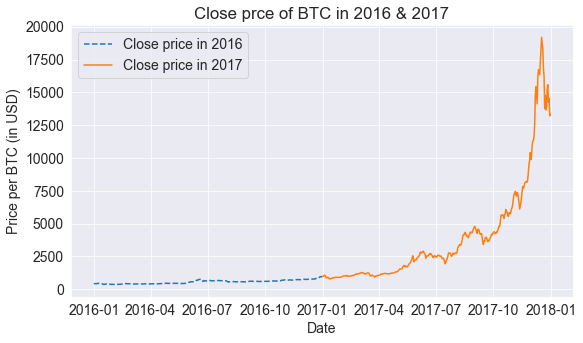

In [86]:
plt.plot(df_2016_in_day['Close'], '--')
plt.plot(df_2017_in_day['Close'])
plt.title('Close prce of BTC in 2016 & 2017')
plt.ylabel('Price per BTC (in USD)')
plt.xlabel('Date')
plt.legend(['Close price in 2016', 'Close price in 2017']);

In [93]:
df_2020_in_day['Close'].tail(1)

date
2020-12-31    28882.010653
Freq: D, Name: Close, dtype: float64

In [92]:
df_2021_in_day['Close'].max()

60458.88889198606

In [91]:
((df_2021_in_day['Close'].max()-(df_2020_in_day['Close'].tail(1)))*100)/ df_2020_in_day['Close'].tail(1)

date
2020-12-31    109.330609
Freq: D, Name: Close, dtype: float64

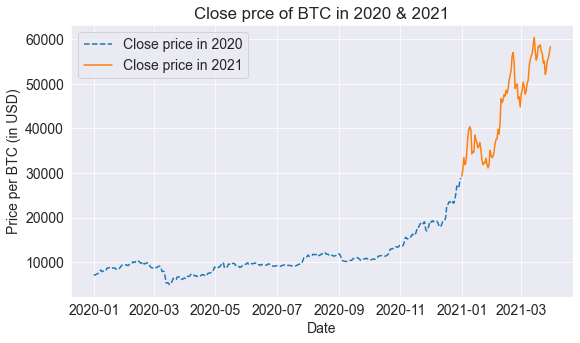

In [94]:
plt.plot(df_2020_in_day['Close'], '--')
plt.plot(df_2021_in_day['Close'])
plt.title('Close prce of BTC in 2020 & 2021')
plt.ylabel('Price per BTC (in USD)')
plt.xlabel('Date')
plt.legend(['Close price in 2020', 'Close price in 2021']);

the price of BTC at the end of 2020 is `$28882` and compared to the highest price of the first three months of 2021 is `$60458` with a growth rate of `109%`

### Q4: Is Bitcoin an efficient store of value?

First, to state the arguments for this question, we can compare Bitcoin with other forms of assets such as gold, bonds, or stocks to show that Bitcoin is a store of value and effective treatment over time.

But for this course assignment, I'm just trying to learn how to work with the essential tools and methods for data analysis. But through it, we can see Bitcoin's value and effective growth over time, specifically after the halving.

In my opinion, and I am not a financial expert, with the attractive growth and proven over time of BTC's history, BTC is a store of value and effective.

### Q5: Should I invest in Bitcoin? (personal perspective)

What is Bitcoin? When learning about the crypto market, many investors question whether I should invest in Bitcoin. There has been a lot of volatility in this investment market recently. Huge returns with high risks make some investors wary, but they also don't want to miss the opportunity to profit from their Bitcoin investment.

Personally, I see some advantages of Bitcoin. First, Bitcoin's outstanding performance has attracted traditional investors and institutions. Bitcoin has become an investment tool with many advantages over conventional investments. Bitcoin is the most liquid investment asset in the crypto market. And Investors can easily trade Bitcoin with extremely low fees, which is very suitable when you are an investor looking for short-term profit and also tend to be a long-term investment market due to market demand high. Next, trading Bitcoin and new cryptocurrencies have emerged and are becoming mainstream, creating opportunities to make a lot of profits. Bitcoin transactions are minimalist as investors don't need to deal with orders like stock trades, which can take days or weeks.

And seeing growth after halvings and at the same time seeing BTC as a way to diversify one's portfolio for the long term. And the next halving event will occur in 2024, and I can still average the price to invest long-term with BTC.


# Inferences and Conclusion
This could be the last step of this course so I can take another action on my journey to learn Data analysis, I know the crypto and Bitcoin market, and I also want to get a chance in Data field analysis. This course was the first one I was determined to complete.

And of course, the value BTC brings to long-term investors is undeniable, and capital management in investment is essential, as we must strengthen and continuously learn in the future. I can say that my words are positive, but looking for an opportunity to change the negativity of the environment itself is what I try to do.

A solid foundation will and understanding of what we invest in is something we have to learn ourselves.


In [95]:
import jovian

In [96]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "huymvpgoat/bitcoin-halving-historical-data-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/huymvpgoat/bitcoin-halving-historical-data-analysis


'https://jovian.ai/huymvpgoat/bitcoin-halving-historical-data-analysis'

# References and Future Work

- https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html
- https://pandas.pydata.org/docs/index.html
- https://www.youtube.com/watch?v=UFuo7EHI8zc&list=PL88jZ1OgkGvZaXZZnAGyqgEA5z3Bf2jK_&index=47&t=1535s
- https://matplotlib.org/
- https://seaborn.pydata.org/examples/index.html

In [97]:
import jovian

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "huymvpgoat/bitcoin-halving-historical-data-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/huymvpgoat/bitcoin-halving-historical-data-analysis


'https://jovian.ai/huymvpgoat/bitcoin-halving-historical-data-analysis'